In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the datasets
cleveland_df = pd.read_csv('C:/Users/yeuvi/Documents/MMU Doc/Degree/Sem 2/TML 6223 - Machine Learning/heart_cleveland_D1.csv')

# Display the first few rows of each dataset
print("\nCleveland Dataset:")
cleveland_df.head()


Cleveland Dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [2]:
# Check for missing values
print(cleveland_df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [3]:
# Fill missing values or drop rows/columns with missing values if any
cleveland_df.fillna(cleveland_df.mean(), inplace=True)

In [4]:
# Convert categorical columns to numeric if necessary
# For simplicity, let's convert any categorical columns to numerical using one-hot encoding
cleveland_df = pd.get_dummies(cleveland_df)

In [5]:
# Ensure target column is binary
cleveland_df['age'] = (cleveland_df['age'] > 0).astype(int)

In [7]:
# Separate features and target variable
X = cleveland_df.drop('condition', axis=1)
y = cleveland_df['condition']

In [8]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

In [11]:
# Train the model
mlp.fit(X_train, y_train)

C:\Users\yeuvi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [12]:
# Make predictions
y_pred = mlp.predict(X_test)

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

In [14]:
# Print formatted accuracy
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.77


In [15]:
# Print formatted classification report
print("Classification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"\nClass {label}:")
        for metric, value in metrics.items():
            if metric in ['precision', 'recall', 'f1-score', 'support']:
                print(f"  {metric}: {value:.2f}")
    else:
        print(f"\n{label}: {metrics:.2f}")

Classification Report:

Class 0:
  precision: 0.82
  recall: 0.72
  f1-score: 0.77
  support: 32.00

Class 1:
  precision: 0.72
  recall: 0.82
  f1-score: 0.77
  support: 28.00

accuracy: 0.77

Class macro avg:
  precision: 0.77
  recall: 0.77
  f1-score: 0.77
  support: 60.00

Class weighted avg:
  precision: 0.77
  recall: 0.77
  f1-score: 0.77
  support: 60.00


In [17]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[23  9]
 [ 5 23]]

True Positives(TP) =  23

True Negatives(TN) =  23

False Positives(FP) =  9

False Negatives(FN) =  5


<Axes: >

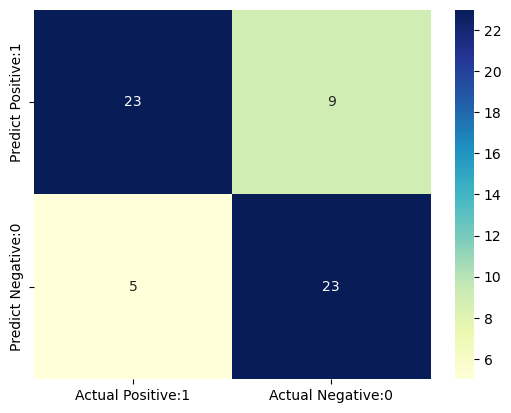

In [20]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')